# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Azat Dovgeldiyev
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
temp=[]
humidity=[]
cloud=[]
wind=[]
lat=[]
lang=[]
country=[]
date=[]
cname=[]
count=1
print("Beginning Data Retrieval \n---------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cname.append(response['name'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lang.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_process=response['name']
        print(f'Processing record {count}| {city_process}')
        count+=1
        time.sleep(1.01)
    except KeyError:
        print('City not found. Skipping...')
    continue
print('---------------------\nData Retrieval complete')

Beginning Data Retrieval 
---------------------
Processing record 1| Thompson
Processing record 2| Tiksi
Processing record 3| Ilulissat
Processing record 4| Arraial do Cabo
Processing record 5| Kaitangata
Processing record 6| Santa Marta
Processing record 7| Padang
City not found. Skipping...
Processing record 8| Chegutu
Processing record 9| Olafsvik
Processing record 10| Puerto Ayora
Processing record 11| Andenes
Processing record 12| Bambous Virieux
Processing record 13| Añisoc
Processing record 14| Himatnagar
Processing record 15| Yellowknife
Processing record 16| Torbay
Processing record 17| Kapaa
Processing record 18| Atuona
Processing record 19| Byron Bay
Processing record 20| Sola
Processing record 21| Bredasdorp
Processing record 22| Albany
Processing record 23| Mataura
Processing record 24| Tongchuanshi
Processing record 25| Port Elizabeth
Processing record 26| Cape Town
Processing record 27| Borogontsy
Processing record 28| Ust-Maya
Processing record 29| Airai
Processing reco

Processing record 232| Chokurdakh
Processing record 233| Pochutla
Processing record 234| Buala
Processing record 235| Ambon City
Processing record 236| Bathsheba
Processing record 237| Bairiki Village
Processing record 238| Northam
Processing record 239| Clonakilty
Processing record 240| Clyde River
Processing record 241| Salalah
Processing record 242| Santa Cruz del Norte
Processing record 243| Belfast
Processing record 244| Alugan
Processing record 245| Bobrovka
Processing record 246| Autun
Processing record 247| Caravelas
Processing record 248| São Filipe
Processing record 249| Departamento de Maldonado
Processing record 250| Yangi Marg`ilon
Processing record 251| Lavrentiya
Processing record 252| Chifeng
Processing record 253| Ugoofaaru
Processing record 254| Maumere
Processing record 255| Leningradskiy
Processing record 256| Cap-aux-Meules
Processing record 257| Guerrero Negro
Processing record 258| Qaqortoq
City not found. Skipping...
Processing record 259| Pevek
City not found. 

City not found. Skipping...
Processing record 468| Vaasa
Processing record 469| Baryatino
Processing record 470| Naze
Processing record 471| Camaná
Processing record 472| Jacareacanga
Processing record 473| Tessalit
Processing record 474| Marsá Maţrūḩ
Processing record 475| Laurel
Processing record 476| Port Macquarie
Processing record 477| Kiunga
Processing record 478| Jieshi
Processing record 479| Matamoros
Processing record 480| Camacha
Processing record 481| Lata
City not found. Skipping...
Processing record 482| Katsina
Processing record 483| Saint-Augustin
Processing record 484| Laï
Processing record 485| Ntoum
Processing record 486| Luoyang
City not found. Skipping...
Processing record 487| Yokadouma
Processing record 488| Evensk
Processing record 489| West Helena
Processing record 490| Bazaliia
Processing record 491| San Miguel de Tucumán
Processing record 492| Kibala
City not found. Skipping...
Processing record 493| Lima
Processing record 494| Dingle
Processing record 495| Ka

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
import csv
weather_dict = {
    "Country":country,
    "City": cname,
    "Lat": lat,
    'Lang':lang,
    "Temp": temp,
    'Cloud':cloud,
    'Wind speed':wind,
    "Humidity":humidity,
    'Date':date,
}
weather_data=pd.DataFrame(weather_dict)
weather_data.to_csv('output_data/weather_data.csv',encoding='utf-8')
weather_data.head()

,Country,City,Lat,Lang,Temp,Cloud,Wind speed,Humidity,Date
0,CA,Thompson,55.74,-97.86,14.00,5,10.29,61,1586451583
1,RU,Tiksi,71.69,128.87,34.79,100,37.20,86,1586451584
2,GL,Ilulissat,69.22,-51.10,24.80,5,5.82,53,1586451585
3,BR,Arraial do Cabo,-22.97,-42.03,77.00,40,23.04,61,1586451586
4,NZ,Kaitangata,-46.28,169.85,48.00,98,10.13,82,1586451587


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

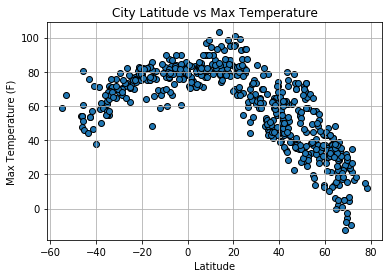

In [6]:
plt.scatter(weather_data['Lat'],weather_data['Temp'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.grid(True)
plt.savefig('output_data\City_Lat vs Max_Temp.png')
plt.show()

#### Latitude vs. Humidity Plot

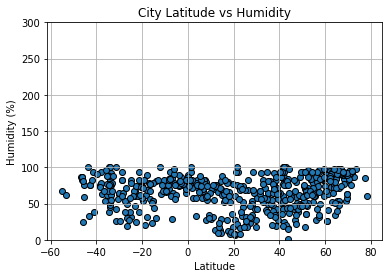

In [7]:
plt.scatter(weather_data['Lat'],weather_data['Humidity'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.ylim(0,300)
plt.grid(True)
plt.savefig('output_data\City_Lat vs Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

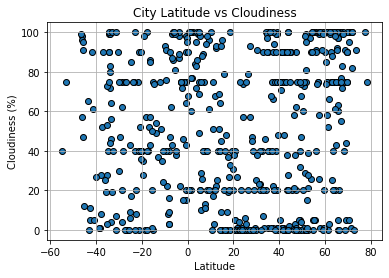

In [8]:
plt.scatter(weather_data['Lat'],weather_data['Cloud'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid(True)
plt.savefig('output_data\City_Lat vs Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

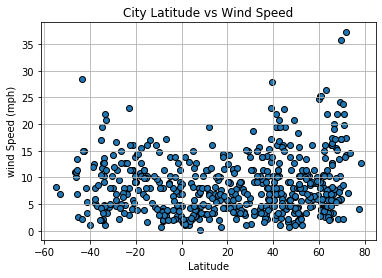

In [9]:
plt.scatter(weather_data['Lat'],weather_data['Wind speed'],marker='o',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.grid(True)
plt.savefig('output_data\City_Lat vs Wind Speed (mph).png')
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig):
    slope, intercept, r_value, p_value, std_err=linregress(x_axis,y_axis)
    line_eq="y = "+str(round(slope,2)) + "x + "+str(round(intercept,2))
    print(f"The r-squared is: {r_value}")
    regress_fit = slope * x_axis +intercept
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_fit,'r-')
    plt.annotate(line_eq,lblpos,fontsize=15,color='red')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.savefig(f'output_data\{fig}.png')
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_pd=weather_data.loc[weather_data['Lat']>=0.0]

southern_pd=weather_data.loc[weather_data['Lat']<0.0]
northern_pd.head()

,Country,City,Lat,Lang,Temp,Cloud,Wind speed,Humidity,Date
0,CA,Thompson,55.74,-97.86,14.00,5,10.29,61,1586451583
1,RU,Tiksi,71.69,128.87,34.79,100,37.20,86,1586451584
2,GL,Ilulissat,69.22,-51.10,24.80,5,5.82,53,1586451585
5,CO,Santa Marta,11.24,-74.20,89.60,75,8.05,70,1586451413
8,IS,Olafsvik,64.89,-23.71,35.55,43,5.32,85,1586451592


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.855733308036883


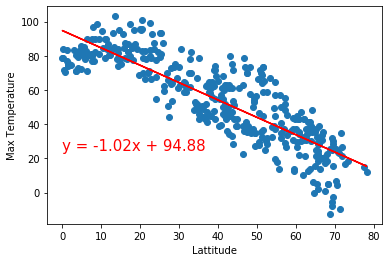

In [12]:
xlab='Lattitude'
ylab='Max Temperature'
x_axis=northern_pd['Lat']
y_axis=northern_pd['Temp']
lblpos=(0,25)
fig='NorthMaxTemp vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6964765278254912


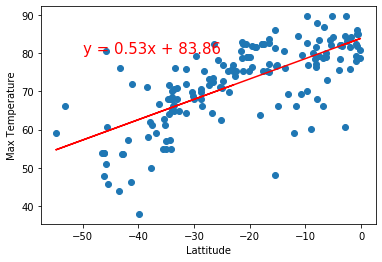

In [13]:
xlab='Lattitude'
ylab='Max Temperature'
x_axis=southern_pd['Lat']
y_axis=southern_pd['Temp']
lblpos=(-50,80)
fig='SouthMaxTemp vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2661780922713276


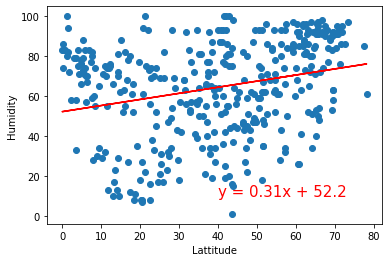

In [14]:
xlab='Lattitude'
ylab='Humidity'
x_axis=northern_pd['Lat']
y_axis=northern_pd['Humidity']
lblpos=(40,10)
fig='NorthHumid vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09102441620531711


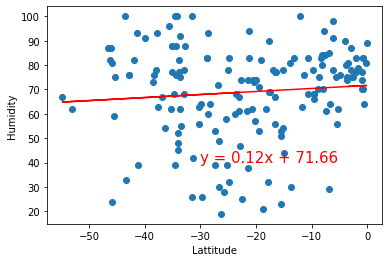

In [15]:
xlab='Lattitude'
ylab='Humidity'
x_axis=southern_pd['Lat']
y_axis=southern_pd['Humidity']
lblpos=(-30,40)
fig='SouthhHumid vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18555623607001565


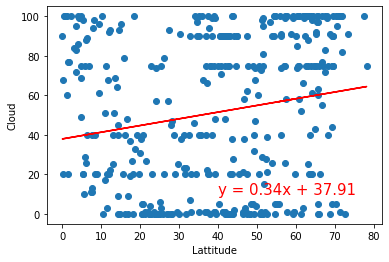

In [16]:
xlab='Lattitude'
ylab='Cloud'
x_axis=northern_pd['Lat']
y_axis=northern_pd['Cloud']
lblpos=(40,10)
fig='NorthCloud vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11065644425455465


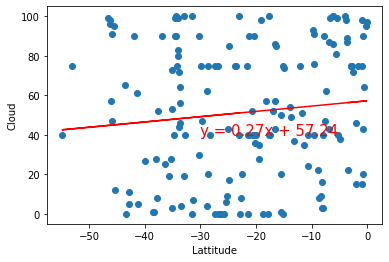

In [17]:
xlab='Lattitude'
ylab='Cloud'
x_axis=southern_pd['Lat']
y_axis=southern_pd['Cloud']
lblpos=(-30,40)
fig='SouthhCloud vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.27974018689628105


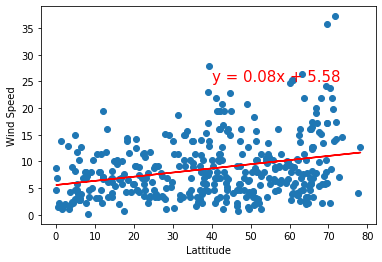

In [18]:
xlab='Lattitude'
ylab='Wind Speed'
x_axis=northern_pd['Lat']
y_axis=northern_pd['Wind speed']
lblpos=(40,25)
fig='NorthWind vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1793380702648638


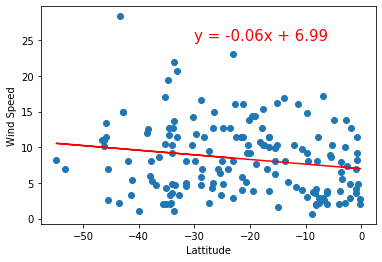

In [19]:
xlab='Lattitude'
ylab='Wind Speed'
x_axis=southern_pd['Lat']
y_axis=southern_pd['Wind speed']
lblpos=(-30,25)
fig='SouthWind vs Lat'
functionPlot(x_axis,y_axis,xlab,ylab,lblpos,fig)